In [6]:
import sys
sys.path.append('investigation_functions')
from investigation_functions import data_process_funcs as dpf

In [7]:
# df_crazy = dpf.create_processed_df("../Simulated_results/4q/4q_fake_fez2.csv")
# df_crazy.info()

In [8]:
# dp_arrS = dpf.arr_dfs_of_qubit_sizes('Simulation', 3, 5)
# dp_arrS = dpf.arr_dfs_of_qubit_sizes('Simulation', 3, 4)

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.preprocessing as preprocessing
from sklearn.preprocessing import MaxAbsScaler

In [10]:
# df_arr = dpf.get_meta_dataframe_unprocessed('Hardware')

In [11]:
# from qiskit_ibm_runtime import QiskitRuntimeService
# import config

# service = QiskitRuntimeService(
#     channel=config.channel,
#     token=config.tokenJAPI,
#     instance=config.instanceJAPI # Optional: include this if using a specific instance
# )

In [12]:
# df_arr_H = dpf.get_meta_dataframe_unprocessed('Hardware', dir_='../',nr_machines=4, updated_results=True, updated_service=service)
# df_arr_S = dpf.get_meta_dataframe_unprocessed('Simulation', dir_='../',nr_machines=4, updated_results=True, updated_service=service)
# df_arr_R = dpf.get_meta_dataframe_unprocessed('Refreshed_Simulation', dir_='../',nr_machines=4, updated_results=True, updated_service=service)

In [13]:
# df_arr_S[9].head()

In [14]:
# df4qH_t = dpf.join_dfs(df_arr_H[:3])
# df4qH_t.tail()

In [15]:
# df4qH_b = dpf.join_dfs(df_arr_H[3:6])
# df4qH_b.head()

In [16]:
# df4qH_f = dpf.join_dfs(df_arr_H[6:9])
# df4qH_f.head()

In [17]:
# df4qH_m = dpf.join_dfs(df_arr_H[9:12])
# df4qH_m.head()

In [18]:
df_4q_H = dpf.get_expanded_df('Hardware',4,dir_ = '../',processed = False, updated_results=True)
df_4q_H = df_4q_H.drop(['0000'],axis =1)
df4qH_t = df_4q_H[df_4q_H['backend']=='torino']
df4qH_b = df_4q_H[df_4q_H['backend']=='brisbane']
df4qH_m = df_4q_H[df_4q_H['backend']=='marrakesh']
df4qH_f = df_4q_H[df_4q_H['backend']=='fez']

In [19]:
mean_t = dpf.find_mean_cols(df4qH_t)
print(mean_t)
mean_b = dpf.find_mean_cols(df4qH_b)
mean_f = dpf.find_mean_cols(df4qH_f)
mean_m = dpf.find_mean_cols(df4qH_m)

0001    392.549708
0010    224.543860
0011     65.116959
0100     62.672515
0101     26.561404
0110     12.473684
0111     30.690058
1000     30.146199
1001     16.701754
1010      3.163743
1011      2.520468
1100      3.263158
1101      2.134503
1110      1.514620
1111      3.152047
dtype: float64


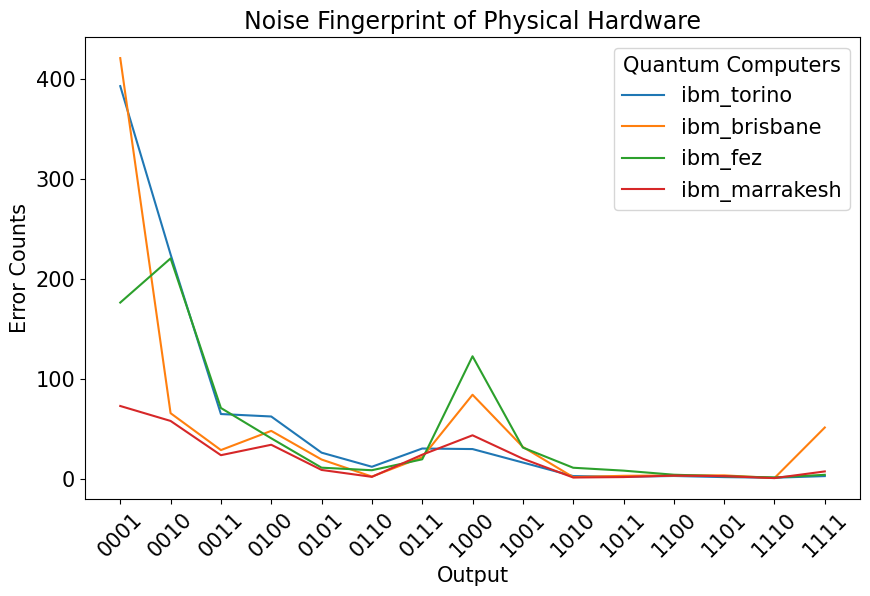

In [ ]:
plt.figure(figsize=(10,6))
plt.xlabel('Output',fontsize = 15)
plt.ylabel('Error Counts',fontsize = 15)
plt.title('Noise Fingerprint of Physical Hardware',fontsize = 17)
plt.plot(mean_t, label = 'ibm_torino')
plt.plot(mean_b, label = 'ibm_brisbane')
plt.plot(mean_f, label = 'ibm_fez')
plt.plot(mean_m, label = 'ibm_marrakesh')
plt.xticks(fontsize = 15, rotation = 45)
plt.yticks(fontsize = 15)
plt.legend(title = 'Quantum Computers', fontsize = 15,title_fontsize = 15)

In [ ]:
print(mean_t.index)

Index(['0001', '0010', '0011', '0100', '0101', '0110', '0111', '1000', '1001',
       '1010', '1011', '1100', '1101', '1110', '1111'],
      dtype='object')


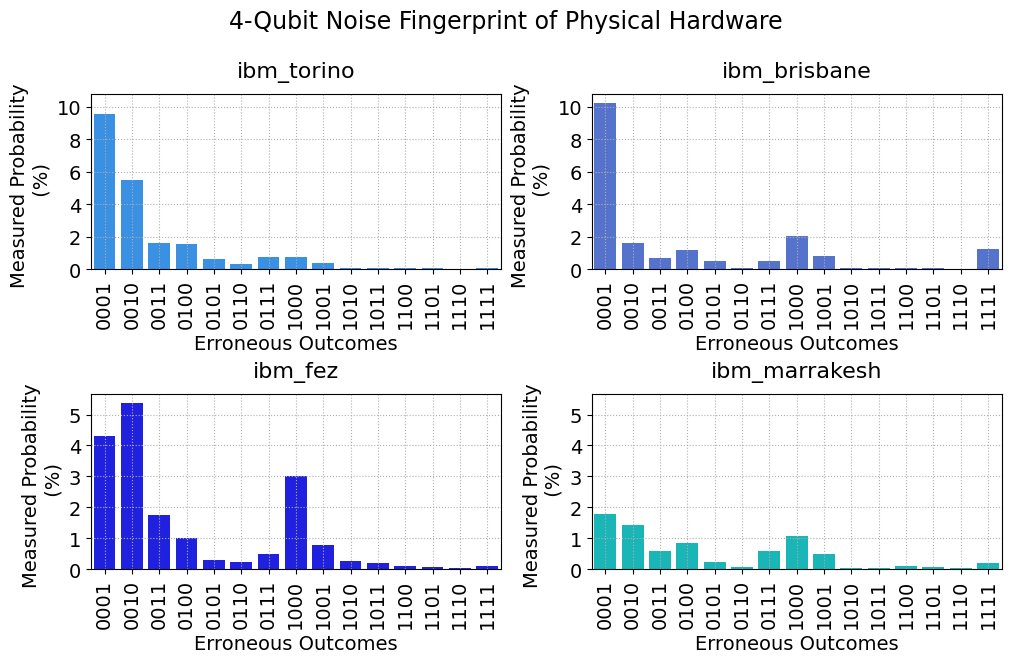

In [88]:
import seaborn as sns
import matplotlib.colors as mcolors

fig = plt.figure(figsize=(10,6), layout = 'constrained')

plt.suptitle(
    '4-Qubit Noise Fingerprint of Physical Hardware',fontsize = 17,
    y = 1.08
)

n_rows = 2
n_cols = 2
x_labels = 'Erroneous Outcomes'
y_labels = 'Measured Probability \n (%)'
x_label_size = 14
y_label_size = 14
subtitle_size = 16
subtitle_y = 1.05
x_tick_rot = 90
# grid_bool = True

plt.subplot(n_rows,n_cols,1,ymargin =1)
ax1 = sns.barplot(
    data =mean_t*100/4096, label = 'ibm_torino',
    color=mcolors.CSS4_COLORS['dodgerblue']
)
plt.grid(linestyle='dotted')
plt.xticks(rotation = x_tick_rot,fontsize = x_label_size)
plt.yticks(fontsize = y_label_size)
ax1.set_ylabel(y_labels ,fontsize = y_label_size)
ax1.set_xlabel(x_labels ,fontsize = x_label_size)
# ax1.get_xticks()
ax1.set_title(
    'ibm_torino',fontsize = subtitle_size,y=subtitle_y)

plt.subplot(n_rows,n_cols,2,sharey = ax1, sharex = ax1)
ax2 = sns.barplot(
    data =mean_b*100/4096, label = 'ibm_brisbane',
    color=mcolors.CSS4_COLORS['royalblue']#['lightseagreen']
)
plt.grid(linestyle='dotted')
plt.xticks(rotation = x_tick_rot,fontsize = x_label_size)
plt.yticks(fontsize = y_label_size)
ax2.set_ylabel(y_labels ,fontsize = y_label_size)
ax2.set_xlabel(x_labels ,fontsize = x_label_size)
ax2.set_title(
    'ibm_brisbane',fontsize = subtitle_size, y=subtitle_y)

plt.subplot(n_rows,n_cols,3,sharex = ax1)
ax3 = sns.barplot(
    data =mean_f*100/4096, label = 'ibm_fez',
    color=mcolors.CSS4_COLORS['blue']
)
plt.grid(linestyle='dotted')
plt.xticks(rotation = x_tick_rot,fontsize = x_label_size)
plt.yticks(fontsize = y_label_size)
ax3.set_ylabel(y_labels ,fontsize = y_label_size)
ax3.set_xlabel(x_labels ,fontsize = x_label_size)
ax3.set_title(
    'ibm_fez',fontsize = subtitle_size, y=subtitle_y)

plt.subplot(n_rows,n_cols,4,sharey = ax3,sharex = ax1)
ax4 = sns.barplot(
    data =mean_m*100/4096, label = 'ibm_marrakesh',
    color=mcolors.CSS4_COLORS['darkturquoise']
)
# plt.grid(grid_bool)
plt.grid( linestyle='dotted')
plt.xticks(rotation = x_tick_rot,fontsize = x_label_size)
plt.yticks(fontsize = y_label_size)
ax4.set_ylabel(y_labels ,fontsize = y_label_size)
ax4.set_xlabel(x_labels ,fontsize = x_label_size)
ax4.set_title(
    'ibm_marrakesh',fontsize = subtitle_size, y=subtitle_y)

plt.show()

# plt.legend(bbox_to_anchor=(1.05, 0.5), loc='center left', borderaxespad=0.)

In [ ]:
df_arr[0].head()

,circuit_type,backend,nr_qubits,totalError,0000,0001,0010,0011,0100,0101,0110,0111,1000,1001,1010,1011,1100,1101,1110,1111
0,1,brisbane,4,674,674,393,46,27,31,4,2.0,21,66,13,0.0,1.0,0.0,1.0,3.0,66
1,1,brisbane,4,609,609,307,59,33,28,4,3.0,21,63,6,0.0,7.0,2.0,1.0,2.0,73
2,1,brisbane,4,563,563,265,53,24,30,7,3.0,36,65,3,0.0,4.0,3.0,2.0,4.0,64
3,1,brisbane,4,671,671,349,50,25,49,5,4.0,33,81,6,3.0,4.0,7.0,1.0,0.0,54
4,1,brisbane,4,700,700,394,55,21,37,5,2.0,41,61,8,1.0,3.0,2.0,4.0,1.0,65


In [ ]:
max_col = dpf.find_max_value_cols(df_arr[0])
print(max_col)

0010     78.0
0011     40.0
0100     67.0
0101     12.0
0110      8.0
0111     46.0
1000     98.0
1001     18.0
1010      4.0
1011      9.0
1100      7.0
1101      6.0
1110      5.0
1111    102.0
dtype: float64


In [ ]:
range_df = dpf.find_range_dataframe(df_arr[7])
range_df.head(15)

,max,min,range,mean,standard deviation,variance
00000001,482.0,116.0,366.0,203.88,99.058144,9812.515918
00000010,67.0,24.0,43.0,47.88,8.596725,73.903673
00000011,50.0,11.0,39.0,34.20,6.821335,46.530612
00000100,144.0,19.0,125.0,44.08,29.653674,879.340408
00000101,19.0,0.0,19.0,6.44,4.616563,21.312653
00000110,8.0,0.0,8.0,2.24,1.790679,3.206531
00000111,66.0,19.0,47.0,39.62,12.430854,154.526122
00001000,90.0,39.0,51.0,58.76,10.651358,113.451429
00001001,26.0,1.0,25.0,5.46,5.384066,28.988163
00001010,7.0,0.0,7.0,1.48,1.388583,1.928163


In [ ]:
df4q = dpf.join_dfs(df_arr[:12])
df4q_range = dpf.find_range_dataframe(df4q)
print(df4q_range)

        max    min  range        mean  standard deviation     variance
0001  604.0  224.0  380.0  406.535088           56.629554  3206.906390
0010  262.0   30.0  232.0  145.251462           80.857109  6537.872065
0011  109.0   16.0   93.0   47.125731           21.851377   477.482679
0100  141.0   21.0  120.0   55.488304           31.379965   984.702209
0101   87.0    0.0   87.0   23.134503           25.573069   653.981856
0110   27.0    0.0   27.0    7.573099            6.102659    37.242441
0111   58.0    0.0   58.0   26.336257           14.949802   223.496570
1000  132.0    4.0  128.0   57.260234           36.617538  1340.844103
1001  106.0    0.0  106.0   24.479532           29.815727   888.977586
1010   13.0    0.0   13.0    2.646199            2.840940     8.070939
1011   11.0    0.0   11.0    2.979532            2.467892     6.090489
1100   15.0    0.0   15.0    3.532164            3.314036    10.982833
1101   20.0    0.0   20.0    3.011696            3.440296    11.835640
1110  

In [ ]:
df4qH = dpf.join_dfs(df_arr_H[:6])
df4qS = dpf.join_dfs(df_arr_S[:6])
df4qR = dpf.join_dfs(df_arr_R[:6])
df4qA = dpf.join_dfs([df4qH, df4qS, df4qR])
# print (df4qA)
df4qA_range = dpf.find_range_dataframe(df4qA)
print(df4qA_range)

        max  min  range        mean  standard deviation      variance
0001  604.0  0.0  604.0  105.847601          163.692022  26795.077992
0010  262.0  0.0  262.0   43.972114           67.496340   4555.755873
0011  109.0  0.0  109.0   10.516861           22.089533    487.947477
0100  141.0  0.0  141.0   25.924125           25.506678    650.590605
0101   87.0  0.0   87.0    5.219196           15.373733    236.351662
0110   27.0  0.0   27.0    1.761349            4.240359     17.980647
0111   58.0  0.0   58.0    5.841764           13.009291    169.241655
1000  132.0  0.0  132.0   23.372244           27.167712    738.084576
1001  106.0  0.0  106.0    5.503891           17.305543    299.481815
1010   13.0  0.0   13.0    0.634890            1.731384      2.997692
1011   11.0  0.0   11.0    0.660830            1.697350      2.880996
1100   15.0  0.0   15.0    0.867056            2.137054      4.567000
1101   20.0  0.0   20.0    0.668612            2.045819      4.185374
1110    7.0  0.0    

In [ ]:
df8q = dpf.join_dfs(df_arr[6:])
df8q_range = dpf.find_range_dataframe(df8q)
print(df8q_range)

            max    min  range        mean  standard deviation     variance
00000001  482.0  104.0  378.0  283.370000           96.818313  9373.785719
00000010  250.0   24.0  226.0  129.790000           81.603450  6659.122977
00000011  109.0   11.0   98.0   45.266667           18.023087   324.831661
00000100  144.0   17.0  127.0   45.953333           22.431564   503.175072
00000101   74.0    0.0   74.0   18.453333           18.329422   335.967715
...         ...    ...    ...         ...                 ...          ...
11111011    3.0    0.0    3.0    0.383333            0.696183     0.484671
11111100    2.0    0.0    2.0    0.060000            0.251550     0.063278
11111101    3.0    0.0    3.0    0.230000            0.527282     0.278027
11111110    6.0    0.0    6.0    0.473333            0.923109     0.852129
11111111   16.0    0.0   16.0    3.720000            3.472048    12.055117

[255 rows x 6 columns]


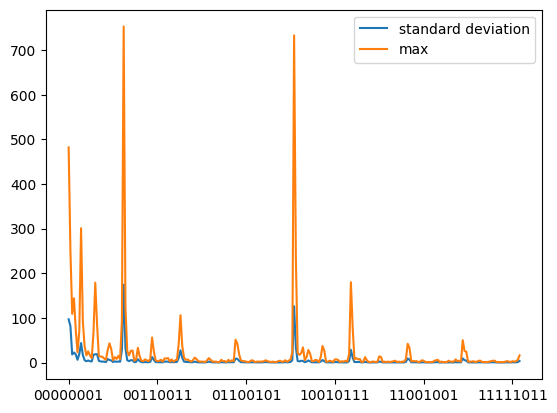

In [ ]:
df8q_range.plot(y = ['standard deviation','max'])
plt.show()

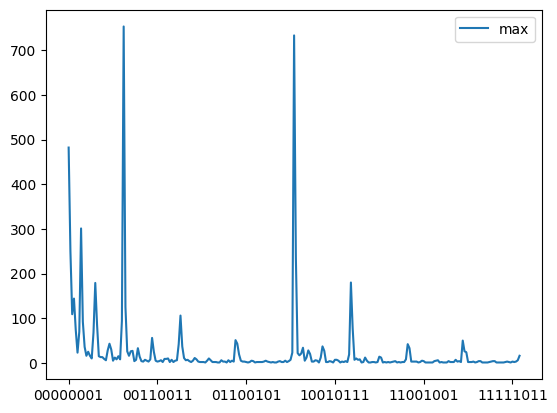

In [ ]:
df8q_range.plot(y = 'max')
plt.show()